# Set up YOLOv4 Environment

In [ ]:
!git clone https://github.com/roboflow-ai/pytorch-YOLOv4.git

fatal: destination path 'pytorch-YOLOv4' already exists and is not an empty directory.


In [ ]:
%cd /content/pytorch-YOLOv4
!pip install -r requirements.txt
# This restarts the runtime--ignore any error messages
import os
os.kill(os.getpid(), 9)

/content/pytorch-YOLOv4


In [ ]:
# download yolov4 weights that have already been converted to PyTorch
%cd /content/pytorch-YOLOv4/cfg/
!gdown https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA

/content/pytorch-YOLOv4/cfg
Downloading...
From: https://drive.google.com/uc?id=1fcbR0bWzYfIEdLJPzOsn4R5mlvR6IQyA
To: /content/pytorch-YOLOv4/cfg/yolov4.conv.137.pth
100% 170M/170M [00:01<00:00, 129MB/s] 


# Download Custom Dataset

## Export Your Dataset from Roboflow

Roboflow enables you to export your dataset in any format you need - including for this notebook.

Create a [free account](https://app.roboflow.ai). Upload your private dataset. Generate a version (applying any preprocessing and augmentations you desire). Create an export. Select **YOLOv4 PyTorch** as the export format. Click **"Show Download code"**, copy your link, and paste it in the next cell. Magic.

In [ ]:
%cd /content/
# REPLACE this link with your Roboflow dataset (export as YOLOv4 PyTorch format)
!curl -L https://app.roboflow.com/ds/fiDCZbDMNa?key=poMebULIqp > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1274      0 --:--:-- --:--:-- --:--:--  1272
100 2143k  100 2143k    0     0  2312k      0 --:--:-- --:--:-- --:--:-- 2312k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/IMG_1321_png.rf.92c8659e64164c0af2dbe70d9022bb1a.jpg  
 extracting: test/IMG_1328_png.rf.1267a0ddadf9491203307fe6896dd173.jpg  
 extracting: test/IMG_1359_png.rf.159fa4efa4f2a7404298469cf97d9f47.jpg  
 extracting: test/IMG_1367_png.rf.48a19c258bb9308ddbe1b1fc12209bec.jpg  
 extracting: test/IMG_1369_png.rf.1f8c73dd152dc567873cb0ab1ee74dac.jpg  
 extracting: test/IMG_1379_png.rf.5367eb4e67bf29d07de9cec401a7a342.jpg  
 extracting: test/IMG_1403_png.rf.f815887dd74949a4c5d053836265a242.jpg  
 extracting: test/IMG_1406_png.rf.9a283d6d0f96

In [ ]:
%cp train/_annotations.txt train/train.txt
%cp train/_annotations.txt train.txt
%mkdir data
%cp valid/_annotations.txt data/val.txt
%cp valid/*.jpg train/

In [ ]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')
print(num_classes)

2


# Train Custom Detector

In [ ]:
#start training
#-b batch size (you should keep this low (2-4) for training to work properly)
#-s number of subdivisions in the batch, this was more relevant for the darknet framework
#-l learning rate
#-g direct training to the GPU device
#pretrained invoke the pretrained weights that we downloaded above
#classes - number of classes
#dir - where the training data is
#epoch - how long to train for
!python ./pytorch-YOLOv4/train.py -b 2 -s 1 -l 0.001 -g 0 -pretrained /content/pytorch-YOLOv4/cfg/yolov4.conv.137.pth -classes {num_classes} -dir ./train -epochs 50

log file path:log/log_2021-12-03_14-21-25.txt
2021-12-03 14:21:26,008 train.py[line:435] INFO: Using device cuda
2021-12-03 14:21:28,636 train.py[line:282] INFO: Starting training:
        Epochs:          50
        Batch size:      2
        Subdivisions:    1
        Learning rate:   0.001
        Training size:   76
        Validation size: 10
        Checkpoints:     True
        Device:          cuda
        Images size:     608
        Optimizer:       adam
        Dataset classes: 2
        Train label path:train.txt
        Pretrained:
    
Epoch 1/50:   0%|         | 0/76 [00:00<?, ?img/s]/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Epoch 1/50:  50%|▌| 38/76 [00:06<00:04,  7.64img/s/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: To get the last learning rate computed by the scheduler, p

# Load Trained Weights for Custom Detection

You can also use this to load previously saved weights!

In [6]:
#looking at the weights that our model has saved during training
!ls checkpoints

Yolov4_epoch10.pth  Yolov4_epoch22.pth	Yolov4_epoch34.pth  Yolov4_epoch46.pth
Yolov4_epoch11.pth  Yolov4_epoch23.pth	Yolov4_epoch35.pth  Yolov4_epoch47.pth
Yolov4_epoch12.pth  Yolov4_epoch24.pth	Yolov4_epoch36.pth  Yolov4_epoch48.pth
Yolov4_epoch13.pth  Yolov4_epoch25.pth	Yolov4_epoch37.pth  Yolov4_epoch49.pth
Yolov4_epoch14.pth  Yolov4_epoch26.pth	Yolov4_epoch38.pth  Yolov4_epoch4.pth
Yolov4_epoch15.pth  Yolov4_epoch27.pth	Yolov4_epoch39.pth  Yolov4_epoch50.pth
Yolov4_epoch16.pth  Yolov4_epoch28.pth	Yolov4_epoch3.pth   Yolov4_epoch5.pth
Yolov4_epoch17.pth  Yolov4_epoch29.pth	Yolov4_epoch40.pth  Yolov4_epoch6.pth
Yolov4_epoch18.pth  Yolov4_epoch2.pth	Yolov4_epoch41.pth  Yolov4_epoch7.pth
Yolov4_epoch19.pth  Yolov4_epoch30.pth	Yolov4_epoch42.pth  Yolov4_epoch8.pth
Yolov4_epoch1.pth   Yolov4_epoch31.pth	Yolov4_epoch43.pth  Yolov4_epoch9.pth
Yolov4_epoch20.pth  Yolov4_epoch32.pth	Yolov4_epoch44.pth
Yolov4_epoch21.pth  Yolov4_epoch33.pth	Yolov4_epoch45.pth


In [24]:
import matplotlib.pyplot as plt

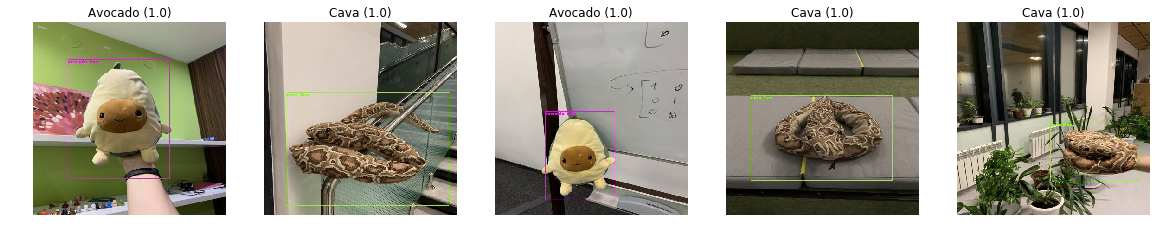

In [37]:
# getting 5 test images
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')][:5]

# initializing the grid
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 12))

# going throug test images and plotting them
for i, image_path in enumerate(test_images):

    # infer an image and save output
    yolo_report = !python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch46.pth test/{image_path} test/_classes.txt

    # getting predicted parameters of plushie
    label = 'Avocado' if 'avocado' in yolo_report[-2].split()[0] else 'Cava'
    score = float(yolo_report[-2].split()[1]) 

    # putting image in the grid
    ax[i].imshow(plt.imread('predictions.jpg'))
    ax[i].set_title(f"{label} ({round(score, 2)})")
    ax[i].axis('off')

plt.show()